In [22]:
import os
import pickle
from dotenv import load_dotenv
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

load_dotenv()

True

In [23]:
# Preparação dos dados
input_dir = os.getenv('INPUT_DIR', 'data/images')
categories = ['empty', 'not_empty']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

In [24]:
# Divisão treino e teste
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [25]:
# Treinando o classificador
classifier = SVC()
parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(classifier, parameters)
grid_search.fit(x_train, y_train)

,estimator,SVC()
,param_grid,"[{'C': [1, 10, ...], 'gamma': [0.01, 0.001, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [26]:
# Avaliando o modelo
best_estimator = grid_search.best_estimator_
y_prediction = best_estimator.predict(x_test)
score = accuracy_score(y_prediction, y_test)
print('{}% dos exemplos foram classificados corretamente'.format(str(score * 100)))

100.0% dos exemplos foram classificados corretamente


In [27]:
#Salvando o modelo
pickle.dump(best_estimator, open('./model.p', 'wb'))

# Vamos testar:
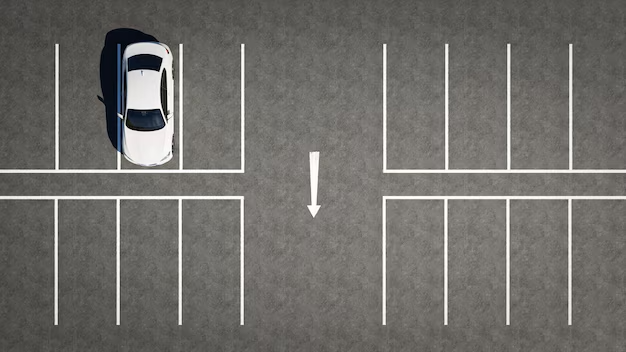

## Primeiro esta

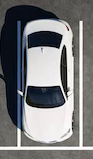

In [ ]:
image_path = os.getenv('IMAGE_PATH', 'C:\\Users\\mborges\\Downloads\\image classifier\\img\\carro.jpg')
img = imread(image_path)
img = resize(img, (15, 15))
img_flattened = img.flatten().reshape(1, -1)

In [43]:
#fazendo a previsão
prediction = best_estimator.predict(img_flattened)

In [44]:
#exibindo o resultado
categories = ['empty', 'not_empty']
print('A imagem foi classificada como: {}'.format(categories[prediction[0]]))

A imagem foi classificada como: not_empty


## Depois esta
![sem carro.png](<attachment:sem carro.png>)
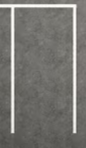

In [45]:
image_path = 'C:\\Users\\mborges\\Downloads\\image classifier\\img\\naocarro.jpg'
img = imread(image_path)
img = resize(img, (15, 15))
img_flattened = img.flatten().reshape(1, -1)

In [46]:
#fazendo a previsão
prediction = best_estimator.predict(img_flattened)

In [47]:
#exibindo o resultado
categories = ['empty', 'not_empty']
print('A imagem foi classificada como: {}'.format(categories[prediction[0]]))

A imagem foi classificada como: empty
